In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import argparse
import json

In [176]:
regular = pd.read_csv('mm25-data/MRegularSeasonDetailedResults.csv')
tourney = pd.read_csv('mm25-data/MNCAATourneyDetailedResults.csv')
massey = pd.read_csv('mm25-data/MMasseyOrdinals.csv')
teams = pd.read_csv('mm25-data/MTeams.csv')
cities = pd.read_csv('mm25-data/Cities.csv')
seeds = pd.read_csv('mm25-data/MNCAATourneySeeds.csv')
seasons = pd.read_csv('mm25-data/MSeasons.csv')
stats = pd.read_csv('mm25-data/MarchMadnessALL.csv')

In [177]:
regular.head()
tourney.head()
massey.head()
teams.head()
cities.head()
seeds.head()
seasons.head()
stats.head()

,Season,Short Conference Name,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,...,Current Coach,Full Team Name,Since,Active Coaching Length,Active Coaching Length Index,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index,Top 12 in AP Top 25 During Week 6?
0,2025,ACC,66.1,253,66.6,259,129.0,2,125.4,1,...,Jon Scheyer,Duke Blue Devils,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,Yes
1,2015,SEC,62.4,274,63.8,242,121.3,6,115.5,9,...,Mark Pope,Kentucky Wildcats,202425.0,0 years,1.0,1,Midwest,March Madness,1,Yes
2,2021,WCC,73.8,7,74.3,14,126.4,1,121.9,1,...,Mark Few,Gonzaga Bulldogs,199900.0,25 years,26.0,1,West,March Madness,1,Yes
3,2024,BE,64.6,330,66.0,305,127.5,1,123.0,1,...,Dan Hurley,UConn Huskies,201819.0,6 years,7.0,1,East,March Madness,1,Yes
4,2025,SEC,68.1,134,69.3,110,129.9,1,122.3,2,...,Bruce Pearl,Auburn Tigers,201415.0,10 years,11.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,Yes


In [178]:
regular.info()
tourney.info()
massey.info()
teams.info()
cities.info()
seeds.info()
seasons.info()
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118449 entries, 0 to 118448
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   118449 non-null  int64 
 1   DayNum   118449 non-null  int64 
 2   WTeamID  118449 non-null  int64 
 3   WScore   118449 non-null  int64 
 4   LTeamID  118449 non-null  int64 
 5   LScore   118449 non-null  int64 
 6   WLoc     118449 non-null  object
 7   NumOT    118449 non-null  int64 
 8   WFGM     118449 non-null  int64 
 9   WFGA     118449 non-null  int64 
 10  WFGM3    118449 non-null  int64 
 11  WFGA3    118449 non-null  int64 
 12  WFTM     118449 non-null  int64 
 13  WFTA     118449 non-null  int64 
 14  WOR      118449 non-null  int64 
 15  WDR      118449 non-null  int64 
 16  WAst     118449 non-null  int64 
 17  WTO      118449 non-null  int64 
 18  WStl     118449 non-null  int64 
 19  WBlk     118449 non-null  int64 
 20  WPF      118449 non-null  int64 
 21  LFGM     1

In [179]:
regular.describe()
tourney.describe()
massey.describe()
teams.describe()
cities.describe()
seeds.describe()
seasons.describe()
stats.describe()

,Season,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,Adjusted Defensive Efficiency,...,RankSFDR,SGDR,RankSGDR,PGDR,RankPGDR,Net Rating,Net Rating Rank,Since,Active Coaching Length Index,Post-Season Tournament Sorting Index
count,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,...,6671.00000,6671.000000,6671.000000,6671.000000,6671.000000,8315.000000,8315.000000,8232.000000,8232.000000,8315.000000
mean,2013.717258,66.544185,173.895009,67.744895,173.885869,103.712772,173.876849,101.886049,173.870956,103.713049,...,176.10823,16.118876,176.080797,14.146056,176.074801,-0.000277,4150.998677,201964.543610,5.561832,3.935298
std,6.906227,3.219306,100.312865,4.037497,100.302087,7.450835,100.317823,7.488487,100.308760,6.465417,...,101.46442,3.335815,101.465121,3.433627,101.471863,12.044559,2399.608813,558.398569,5.541008,1.623928
min,2002.000000,51.600000,1.000000,0.000000,1.000000,71.500000,1.000000,0.000000,1.000000,84.100000,...,1.00000,0.000000,1.000000,0.000000,1.000000,-46.100000,1.000000,198485.000000,1.000000,1.000000
25%,2008.000000,64.500000,87.000000,65.700000,87.000000,98.700000,87.000000,97.700000,87.000000,99.300000,...,88.00000,14.000000,88.000000,12.160000,88.000000,-8.600000,2072.000000,201819.000000,2.000000,2.000000
50%,2014.000000,66.500000,174.000000,67.800000,174.000000,103.600000,174.000000,102.200000,174.000000,103.900000,...,176.00000,15.930000,176.000000,13.860000,176.000000,-0.800000,4152.000000,202223.000000,3.000000,5.000000
75%,2020.000000,68.600000,260.000000,69.900000,260.000000,108.800000,260.000000,106.500000,260.000000,108.400000,...,264.00000,18.020000,264.000000,15.790000,264.000000,8.400000,6224.000000,202324.000000,7.000000,5.000000
max,2025.000000,89.700000,364.000000,90.600000,364.000000,129.900000,364.000000,125.400000,364.000000,125.000000,...,364.00000,80.800000,364.000000,99.970000,364.000000,39.700000,8314.000000,202425.000000,40.000000,5.000000


In [180]:
regular.isnull().sum()
tourney.isnull().sum()
massey.isnull().sum()
teams.isnull().sum()
cities.isnull().sum()
seeds.isnull().sum()
seasons.isnull().sum()
stats.isnull().sum()

Season                                  0
Short Conference Name                   0
Adjusted Temo                           0
Adjusted Tempo Rank                     0
Raw Tempo                               0
                                       ..
Seed                                    0
Region                                  0
Post-Season Tournament                  0
Post-Season Tournament Sorting Index    0
Top 12 in AP Top 25 During Week 6?      0
Length: 147, dtype: int64

<Axes: >

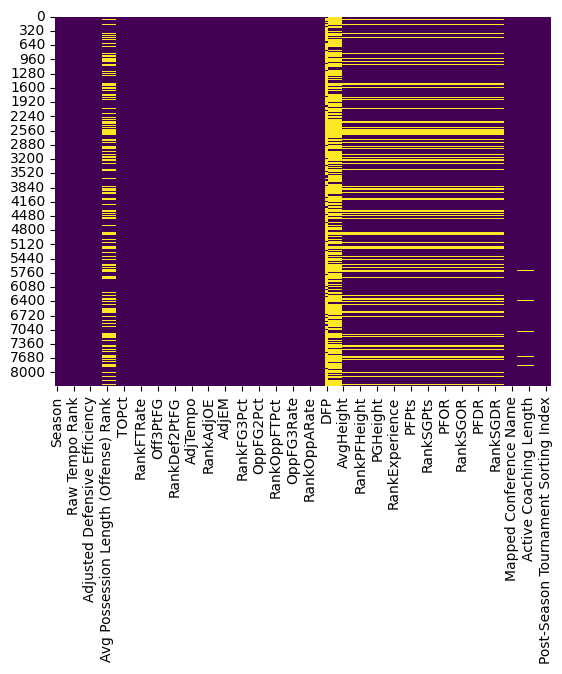

In [181]:
sns.heatmap(stats.isnull(), cbar=False, cmap='viridis')

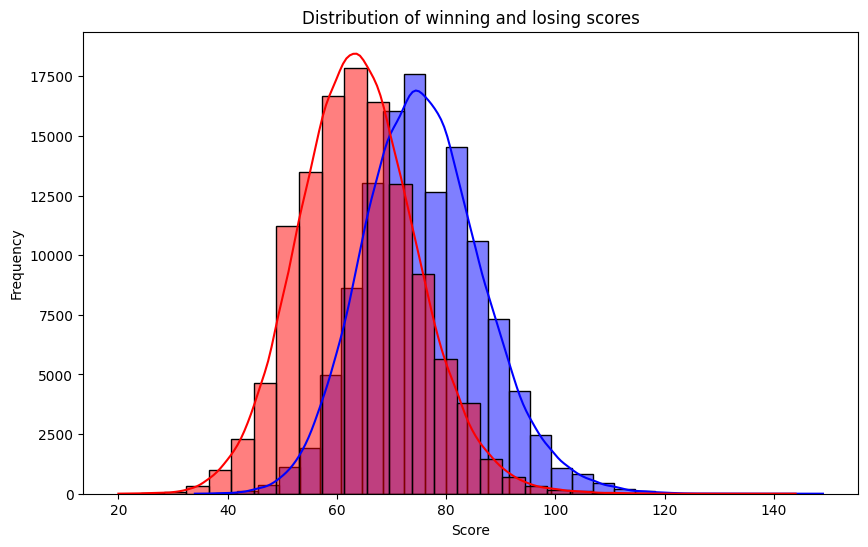

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(regular['WScore'], bins=30, kde=True, label='Winning Score', color='blue')
sns.histplot(regular['LScore'], bins=30, kde=True, label='Losing Score', color='red')
plt.title('Distribution of winning and losing scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [183]:
def create_matchup_features(df_stats, df_results, df_seeds):
    matchups = []
    
    for _, game in df_results.iterrows():
        season = game['Season']
        w_team = game['WTeamID']
        l_team = game['LTeamID']
        daynum = game['DayNum']
        
        if daynum <= 135:
            round_num = 0
        elif daynum <= 137:
            round_num = 1
        elif daynum <= 139:
            round_num = 2
        elif daynum <= 144:
            round_num = 3 
        elif daynum <= 146:
            round_num = 4
        elif daynum <= 152:
            round_num = 5
        else:
            round_num = 6
        
        w_stats = df_stats[(df_stats['Season'] == season) & 
                           (df_stats['Mapped ESPN Team Name'] == teams[teams['TeamID'] == w_team]['TeamName'].values[0])]
        l_stats = df_stats[(df_stats['Season'] == season) & 
                           (df_stats['Mapped ESPN Team Name'] == teams[teams['TeamID'] == l_team]['TeamName'].values[0])]
        
        if len(w_stats) == 0 or len(l_stats) == 0:
            continue
            
        try:
            w_seed = int(df_seeds[(df_seeds['Season'] == season) & 
                               (df_seeds['TeamID'] == w_team)]['Seed'].values[0][1:3])
            l_seed = int(df_seeds[(df_seeds['Season'] == season) & 
                               (df_seeds['TeamID'] == l_team)]['Seed'].values[0][1:3])
        except:
            try:
                w_seed = int(df_seeds[(df_seeds['Season'] == season) & 
                                  (df_seeds['TeamID'] == w_team)]['Seed'].values[0][1:3])
            except:
                w_seed = 16
            try:
                l_seed = int(df_seeds[(df_seeds['Season'] == season) & 
                                  (df_seeds['TeamID'] == l_team)]['Seed'].values[0][1:3])
            except:
                l_seed = 16
        
        features = {}
        features['Season'] = season
        features['Round'] = round_num
        features['SeedDiff'] = l_seed - w_seed
        
        for col in ['Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 
                    'Adjusted Temo', 'eFGPct', 'TOPct', 'ORPct', 'FTRate',
                    'Experience', 'AdjEM', 'Net Rating']:
            if col in w_stats.columns and col in l_stats.columns:
                features[f'{col}_diff'] = float(w_stats[col].values[0]) - float(l_stats[col].values[0])
        features['Team'] = w_stats["Mapped ESPN Team Name"].values[0]
        features['Opponent'] = l_stats["Mapped ESPN Team Name"].values[0]
        features['result'] = 1
        matchups.append(features)
        
        features_reverse = features.copy()
        for col in features.keys():
            if col.endswith('_diff'):
                features_reverse[col] = -features[col]
        features_reverse['SeedDiff'] = -features['SeedDiff']
        features_reverse['result'] = 0
        features_reverse['Team'] = l_stats["Mapped ESPN Team Name"].values[0]
        features_reverse['Opponent'] = w_stats["Mapped ESPN Team Name"].values[0]
        matchups.append(features_reverse)
    
    return pd.DataFrame(matchups)

matchup_data = create_matchup_features(stats, tourney, seeds)

In [184]:
matchup_data.head()

,Season,Round,SeedDiff,Adjusted Offensive Efficiency_diff,Adjusted Defensive Efficiency_diff,Adjusted Temo_diff,eFGPct_diff,TOPct_diff,ORPct_diff,FTRate_diff,Experience_diff,AdjEM_diff,Net Rating_diff,Team,Opponent,result
0,2003,1,15,14.5,-10.7,8.3,2.7429,-2.4229,2.2302,2.5011,NaN,25.22523,25.2,Arizona,Vermont,1
1,2003,1,-15,-14.5,10.7,-8.3,-2.7429,2.4229,-2.2302,-2.5011,NaN,-25.22523,-25.2,Vermont,Arizona,0
2,2003,1,1,-1.3,-1.8,0.9,-1.0445,-1.3144,0.5997,-5.2267,NaN,0.41480,0.5,California,NC State,1
3,2003,1,-1,1.3,1.8,-0.9,1.0445,1.3144,-0.5997,5.2267,NaN,-0.41480,-0.5,NC State,California,0
4,2003,1,-1,8.2,7.4,0.5,9.5876,4.5708,3.1088,9.6326,NaN,0.89500,0.8,Gonzaga,Cincinnati,1


In [185]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [186]:
features = [col for col in matchup_data.columns if col not in ['Season', 'result', 'Team', 'Opponent']]
X = matchup_data[features]
y = matchup_data['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBClassifier(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

model.fit(
    X_train_scaled, 
    y_train,
    eval_set=[(X_test_scaled, y_test)]
)

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

print(f"Log Loss: {log_loss(y_test, y_pred_proba)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[0]	validation_0-logloss:0.68972
[1]	validation_0-logloss:0.68612
[2]	validation_0-logloss:0.68294
[3]	validation_0-logloss:0.67959
[4]	validation_0-logloss:0.67635
[5]	validation_0-logloss:0.67316
[6]	validation_0-logloss:0.66999
[7]	validation_0-logloss:0.66692
[8]	validation_0-logloss:0.66375
[9]	validation_0-logloss:0.66083
[10]	validation_0-logloss:0.65802
[11]	validation_0-logloss:0.65497
[12]	validation_0-logloss:0.65271
[13]	validation_0-logloss:0.65007
[14]	validation_0-logloss:0.64733
[15]	validation_0-logloss:0.64456
[16]	validation_0-logloss:0.64193
[17]	validation_0-logloss:0.63939
[18]	validation_0-logloss:0.63682
[19]	validation_0-logloss:0.63426
[20]	validation_0-logloss:0.63197
[21]	validation_0-logloss:0.62968
[22]	validation_0-logloss:0.62727
[23]	validation_0-logloss:0.62514
[24]	validation_0-logloss:0.62265
[25]	validation_0-logloss:0.62033
[26]	validation_0-logloss:0.61806
[27]	validation_0-logloss:0.61596
[28]	validation_0-logloss:0.61379
[29]	validation_0-loglos

<Figure size 1200x800 with 0 Axes>

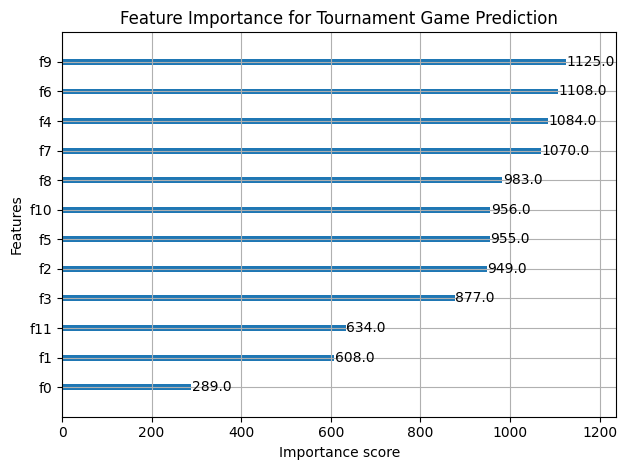

In [187]:
plt.figure(figsize=(12, 8))
xgb.plot_importance(model, max_num_features=15)
plt.title('Feature Importance for Tournament Game Prediction')
plt.tight_layout()
plt.show()

In [188]:
def simulate_game(team_a_name, team_b_name, team_a_seed, team_b_seed, round_num, 
                  city=None, season=2025, current_stats_df=None, model=None, scaler=None):
    """
    Simulate a March Madness game between two teams.
    
    Parameters:
    team_a_name (str): Name of first team
    team_b_name (str): Name of second team
    team_a_seed (int): Seed of first team (1-16)
    team_b_seed (int): Seed of second team (1-16)
    round_num (int): Tournament round (0=play-in, 1=first round, 2=second round, etc.)
    city (str): City where game is played (optional)
    season (int): Season year (default is current season)
    current_stats_df (DataFrame): DataFrame containing current season stats
    model: Trained prediction model
    scaler: Feature scaler used during training
    
    Returns:
    dict: Game prediction results including win probabilities
    """
    if current_stats_df is None or model is None or scaler is None:
        raise ValueError("Must provide current stats dataframe, trained model, and scaler")
    
    team_a_stats = current_stats_df[current_stats_df['Mapped ESPN Team Name'] == team_a_name]
    team_b_stats = current_stats_df[current_stats_df['Mapped ESPN Team Name'] == team_b_name]
    
    if len(team_a_stats) == 0 or len(team_b_stats) == 0:
        raise ValueError(f"Could not find stats for one or both teams: {team_a_name}, {team_b_name}")
    
    features = {}
    features['Round'] = round_num
    features['SeedDiff'] = team_b_seed - team_a_seed
    
    for col in ['Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 
                'Adjusted Temo', 'eFGPct', 'TOPct', 'ORPct', 'FTRate',
                'Experience', 'AdjEM', 'Net Rating']:
        if col in team_a_stats.columns and col in team_b_stats.columns:
            features[f'{col}_diff'] = float(team_a_stats[col].values[0]) - float(team_b_stats[col].values[0])
    
    matchup_features = pd.DataFrame([features])
    matchup_features_scaled = scaler.transform(matchup_features)
    
    team_a_win_prob = model.predict_proba(matchup_features_scaled)[0, 1]
    team_b_win_prob = 1 - team_a_win_prob
    
    num_simulations = 10000
    simulation_results = np.random.binomial(n=1, p=team_a_win_prob, size=num_simulations)
    team_a_win_count = np.sum(simulation_results)
    team_b_win_count = num_simulations - team_a_win_count
    
    team_a_sim_win_pct = team_a_win_count / num_simulations
    team_b_sim_win_pct = team_b_win_count / num_simulations
    
    results = {
        'team_a': {
            'name': team_a_name,
            'seed': team_a_seed,
            'win_probability': team_a_win_prob,
            'simulated_win_pct': team_a_sim_win_pct
        },
        'team_b': {
            'name': team_b_name,
            'seed': team_b_seed,
            'win_probability': team_b_win_prob,
            'simulated_win_pct': team_b_sim_win_pct
        },
        'predicted_winner': team_a_name if team_a_win_prob > 0.5 else team_b_name,
        'round': round_num,
        'location': city
    }
    
    # Return summary with extra info for analysis
    return results

In [189]:
def predict_matchup(team_a, team_b, seed_a, seed_b, round_num=1):    
    result = simulate_game(
        team_a, team_b, 
        seed_a, seed_b,
        round_num=round_num,
        season=2025,
        current_stats_df=stats,
        model=model,
        scaler=scaler
    )
    
    print(f"\n===== {team_a} vs {team_b} =====")
    print(f"Round: {round_num}")
    print(f"{team_a} (Seed {seed_a}): {result['team_a']['win_probability']:.1%} win probability")
    print(f"{team_b} (Seed {seed_b}): {result['team_b']['win_probability']:.1%} win probability")
    print(f"Predicted Winner: {result['predicted_winner']}")
    
    return result

prediction = predict_matchup("Duke", "Kentucky", 2, 7, round_num=2)


===== Duke vs Kentucky =====
Round: 2
Duke (Seed 2): 26.9% win probability
Kentucky (Seed 7): 73.1% win probability
Predicted Winner: Kentucky
